## 4.3 Monte Carlo Simulation of the Ising Model

The Ising Model is a simplified version of a ferromagnet - where the structure of the material consist of a single dipole per lattice site. The overall magnetization of the material is determined by the number of dipoles that are aligned parallel to one-another. The Ising Model is a beautifully simpl demonstration of the implications of statistical mechanics and phase transitions - as well a being an fantastic example of the power of Monte Carlo Simulations.

### Model descriptions

1. Create a 2D lattice using 2D array of size 50x50

2. Fill the arrays with spin states using -1 or +1 randomly

3. Randomly select an element from the 2D lattice

4. Flip the spin state of the selected element and calculate the change in energy due to the flipping process:
    
    $${E_{mn}} =  - 2\sum\limits_{ij} {{s_{ij}}{s_{mn}}} $$

5. if ${E_{mn}} \le 0$ then the spin is permanently flipped,
   else calculate the Boltzmann's probability, $p$:
   
   $$p = {e^{ - \beta {E_{mn}}}}$$
 
    random a number $x$ btween 0 and 1:

    if $x \le p$ then spin is permanently flipped.

    otherwise, spin returns to its original state.
    
6. Plot 2D grid

7. Repeat step 3 for 100,000 times

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import matplotlib.animation as animation



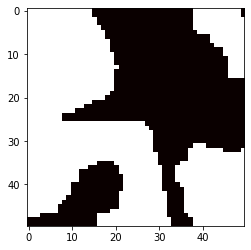

In [13]:
# grid = np.zeros((50,50))
k = scipy.constants.Boltzmann
T = 265
B = 1/(k*T)
grid = np.where(np.random.randint(2, size=(51, 51)) == 0, -1, 1)


def energy(a,b):

        return 2 * grid[a][b] * (grid[a-1][b]+grid[a+1][b]+grid[a][b-1]+grid[a][b+1])
# print(energy(0,0))

def p(energy,B):
    return np.exp(-B*energy)

frames = []
def ans(B):
    for _ in range(100000):
        frames.append(grid[:50,:50].copy())
        a = random.randint(0,49)
        b = random.randint(0,49)
        x = random.random()
        if x <= p(energy(a,b),B):
            grid[a][b] = grid[a][b]*-1
    
    return grid[:50,:50]

plt.imshow(ans(10),cmap='hot')

# print(len(frames),len(frames[::1000]))

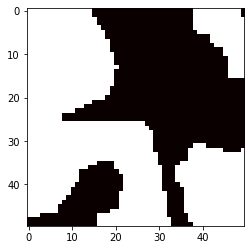

In [14]:
frames = frames[::100]

plt.imshow(frames[-1],cmap='hot')

MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

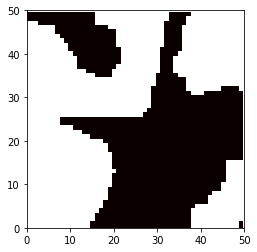

In [15]:
# print(frames)
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 50), ylim=(0, 50))
line = plt.imshow(frames[0],cmap="hot")


def animate(i):
    line.set_array(frames[i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(frames), repeat=False)
anim.save('ising model.gif', fps = 20)
plt.show